In [172]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
def equation_system(N, Q0tr, Q1tr, x, p, k=1): #N, Q0tr, Q1tr, x, p, k=1

    A = np.zeros((N, N))
    B = np.zeros(N)
    
    np.fill_diagonal(A[:6, 12:18], -1)
    np.fill_diagonal(A[:6, 18:24], 1)
    B[0:6] = Q0tr - Q1tr

    np.fill_diagonal(A[6:12, 0:6], -1)
    np.fill_diagonal(A[6:12, 6:12], 1)
    np.fill_diagonal(A[6:12, 12:18], 2*k*Q0tr*(Q0tr/np.abs(Q0tr))*x)
    B[6:12] = -k*(Q0tr**2)*(Q0tr/np.abs(Q0tr)*x)

    np.fill_diagonal(A[12:17, 0:5], 1)
    np.fill_diagonal(A[12:17, 1:6], -1)
    B[12:17] = 0

    A[17][12:18] = 1
    B[17] = -np.sum(Q0tr)

    np.fill_diagonal(A[18:24, 6:12], 1)
    B[18:24] = p**2
    
    return A, B

In [278]:
eta = 0.01
tol = 0.00001

k = 1
Q0tr = Q1tr = np.array([1, 1, 1, -1, -1, -1])
x = np.array([1, 1, 1, 1, 1, 1])
p = np.arange(1, 7)
N=24



def iter_solve(criteria, Q0tr, Q1tr, x, p, k=1, verb=True):
    summ=2
    i=0
    diff=1
    
    if criteria == 'summa':
        
        while summ!=0.:
            A, B = equation_system(N, Q0tr, Q1tr, x, p, k=1)
            X = np.linalg.solve(A, B)
            Qad = X[12:18]
            Q0tr = Q1tr = Q0tr + eta * Qad
            summ = np.sum(Q0tr)
            if verb:
                print(i)
                print('Q0tr:', Q0tr)
                print('Qad:', Qad)
                print('Sum:', np.sum(Q0tr))
                print('---------------')
            i+=1
            
    elif criteria == 'tolerance':
        
        while (diff >= tol) or (np.abs(summ) >= tol):
            A, B = equation_system(N, Q0tr, Q1tr, x, p, k=1)
            X = np.linalg.solve(A, B)
            Qad = X[12:18]
#             new_Q = Q0tr + eta * Qad
            diff = np.max(Qad)
            Q0tr = Q1tr = Q0tr + eta * Qad
            summ = np.sum(Q0tr)
            if verb:
                if i%100 == 0:
                    print(i)
                    print('Q0tr:', Q0tr)
                    print('Qad:', Qad)
                    print('Max Qad:', round(diff,7))
#                     print('Sum:', np.sum(Q0tr))
                    print('---------------')
            i+=1
    
    
    y_0, y_1 = X[:6], X[6:12]
    p_0, p_1 = np.sqrt(y_0), np.sqrt(y_1)
    print(i-1)
    print('Q:', np.around(Q0tr, 4))
    print('p_0:', np.around(p_0, 4))
    print('p_1:', np.around(p_1, 4))
    print('Sum Q:', np.sum(Q0tr))
    print('===============')
    
    
    return np.around(Q0tr, 4), np.around(p_0, 4), np.around(p_1, 4)
            


In [279]:
Q, p_0, p_1 = iter_solve('tolerance', Q0tr, Q1tr, x, p, k=1)

0
Q0tr: [ 1.06583333  1.05083333  1.02583333 -0.99916667 -1.04416667 -1.09916667]
Qad: [ 6.58333333  5.08333333  2.58333333  0.08333333 -4.41666667 -9.91666667]
Max Qad: 6.5833333
---------------
100
Q0tr: [ 2.99176966  2.65132598  1.95698428 -1.1679491  -2.66827154 -3.76385927]
Qad: [ 0.74807391  0.63804352  0.39854433 -0.114696   -0.66593148 -1.00403428]
Max Qad: 0.7480739
---------------
200
Q0tr: [ 3.42801204  3.02421208  2.19187622 -1.23892552 -3.05748668 -4.34768814]
Qad: [ 0.23794829  0.20377171  0.12931511 -0.04072093 -0.21267056 -0.31764362]
Max Qad: 0.2379483
---------------
300
Q0tr: [ 3.57412226  3.14940476  2.2715005  -1.2643074  -3.18813334 -4.54258678]
Qad: [ 0.08344469  0.07153526  0.04559271 -0.01470103 -0.07464346 -0.11122817]
Max Qad: 0.0834447
---------------
400
Q0tr: [ 3.62610281  3.19397442  2.29992749 -1.27350998 -3.23463748 -4.61185727]
Qad: [ 0.03009482  0.02580862  0.01647259 -0.00535309 -0.02692759 -0.04009534]
Max Qad: 0.0300948
---------------
500
Q0tr: [ 

In [280]:
Q

array([ 3.6558,  3.2194,  2.3162, -1.2788, -3.2612, -4.6514])

In [281]:
p_0

array([3.7901, 3.7901, 3.7901, 3.7901, 3.7901, 3.7901])

In [282]:
p_1

array([1., 2., 3., 4., 5., 6.])

In [283]:
np.sum(Q)

-8.881784197001252e-16

In [284]:
np.sum(Q[:3])

9.1914

In [285]:
np.sum(Q[3:])

-9.1914

In [286]:
np.sqrt(3.7901**2-3.2194**2)

2.0000804108835224

In [287]:
delta_length = np.arange(1, 11)
Q_arr = []
p_0_arr = []
for d in delta_length:
    x_delta = np.concatenate(([d], x[1:]))
    print(d)
    Q, p_0, _ = iter_solve('tolerance', Q0tr, Q1tr, x_delta, p, k=1, verb=False)
    Q_arr.append(Q[0])
    p_0_arr.append(p_0[0])

1
1197
Q: [ 3.6558  3.2194  2.3162 -1.2788 -3.2612 -4.6514]
p_0: [3.7901 3.7901 3.7901 3.7901 3.7901 3.7901]
p_1: [1. 2. 3. 4. 5. 6.]
Sum Q: -8.881784197001252e-16
2
1185
Q: [ 2.6707  3.3564  2.5031 -0.8569 -3.12   -4.5535]
p_0: [3.9071 3.9071 3.9071 3.9071 3.9071 3.9071]
p_1: [1. 2. 3. 4. 5. 6.]
Sum Q: 0.0
3
1186
Q: [ 2.2078  3.4092  2.5735 -0.6142 -3.0622 -4.5141]
p_0: [3.9526 3.9526 3.9526 3.9526 3.9526 3.9526]
p_1: [1. 2. 3. 4. 5. 6.]
Sum Q: 5.329070518200751e-15
4
1186
Q: [ 1.9238  3.4358  2.6086 -0.4419 -3.0324 -4.4939]
p_0: [3.9755 3.9755 3.9755 3.9755 3.9755 3.9755]
p_1: [1. 2. 3. 4. 5. 6.]
Sum Q: 1.7763568394002505e-15
5
1186
Q: [ 1.7266  3.4505  2.6279 -0.3067 -3.0156 -4.4826]
p_0: [3.9882 3.9882 3.9882 3.9882 3.9882 3.9882]
p_1: [1. 2. 3. 4. 5. 6.]
Sum Q: 7.105427357601002e-15
6
1185
Q: [ 1.5792  3.4587  2.6386 -0.1939 -3.0062 -4.4763]
p_0: [3.9953 3.9953 3.9953 3.9953 3.9953 3.9953]
p_1: [1. 2. 3. 4. 5. 6.]
Sum Q: 1.7763568394002505e-15
7
1183
Q: [ 1.4634  3.4628  2.644  -0

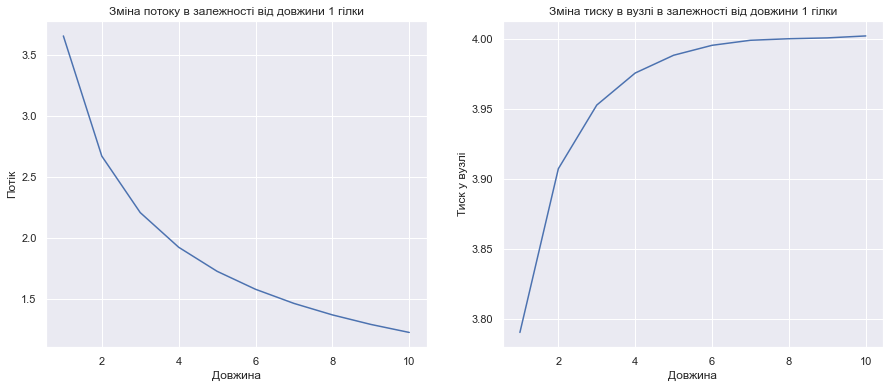

In [293]:
sns.set_theme()

fig, axs = plt.subplots(1,2, figsize=(15,6))

# axs[0].grid()
axs[0].plot(delta_length, Q_arr)
axs[0].set_ylabel('Потік')
axs[0].set_xlabel('Довжина')
axs[0].set_title('Зміна потоку в залежності від довжини 1 гілки')

# axs[1].grid()
axs[1].plot(delta_length, p_0_arr)
axs[1].set_ylabel('Тиск у вузлі')
axs[1].set_xlabel('Довжина')
axs[1].set_title('Зміна тиску в вузлі в залежності від довжини 1 гілки')


plt.show()

In [290]:
Q_arr

[3.6558,
 2.6707,
 2.2078,
 1.9238,
 1.7266,
 1.5792,
 1.4634,
 1.3693,
 1.2912,
 1.2254]

In [291]:
p_0_arr

[3.7901, 3.9071, 3.9526, 3.9755, 3.9882, 3.9953, 3.9989, 4.0, 4.0006, 4.002]

In [115]:
eta = 0.01

k = 1
Q0tr = Q1tr = np.array([1, 1, 1, -1, -1, -1])
x = np.array([1, 1, 1, 1, 1, 1])
p = np.arange(1, 7)

# A = np.zeros((24, 24))
# B = np.zeros(24)

summ=None
i = 0
while summ != 0.:
# for n in range(1501):
    A = np.zeros((24, 24))
    B = np.zeros(24)
    np.fill_diagonal(A[:6, 12:18], -1)
    np.fill_diagonal(A[:6, 18:24], 1)
    B[0:6] = Q0tr - Q1tr

    np.fill_diagonal(A[6:12, 0:6], -1)
    np.fill_diagonal(A[6:12, 6:12], 1)
    np.fill_diagonal(A[6:12, 12:18], 2*k*Q0tr*(Q0tr/np.abs(Q0tr))*x)
    B[6:12] = -k*(Q0tr**2)*(Q0tr/np.abs(Q0tr)*x)

    np.fill_diagonal(A[12:17, 0:5], 1)
    np.fill_diagonal(A[12:17, 1:6], -1)
    B[12:17] = 0

    A[17][12:18] = 1
    B[17] = -np.sum(Q0tr)

    np.fill_diagonal(A[18:24, 6:12], 1)
    B[18:24] = p**2
#     A, B = equation_system(N, Q0tr, Q1tr, x, p, k=1)

    X = np.linalg.solve(A, B)
    Qad = X[12:18]
    Q0tr = Q1tr = Q0tr + eta * Qad
    summ = np.sum(Q0tr)
    print(i)
    print(Q0tr)
    print('Sum:', np.sum(Q0tr))
    print('---------------')
    i+=1
    
    
#     Qad = X[12:18]
#     new_Q = Q0tr + eta * Qad
#     diff = Q0tr - new_Q
#     Q0tr = Q1tr = Q0tr + eta * Qad
#     summ = np.sum(Q0tr)
#     if i%20 == 0:
#         print(i)
#         print(Q0tr)
#         print('diff: ', diff)
#         print('Sum:', np.sum(Q0tr))
#         print('---------------')
#     i+=1



0
[ 1.06583333  1.05083333  1.02583333 -0.99916667 -1.04416667 -1.09916667]
Sum: 2.220446049250313e-16
---------------
1
[ 1.12636965  1.09811045  1.05014523 -0.99897321 -1.08663781 -1.18901431]
Sum: -2.220446049250313e-16
---------------
2
[ 1.18264715  1.14246262  1.07320756 -0.99925094 -1.127464   -1.27160239]
Sum: 0.0
---------------


In [49]:
Qad = X[12:18]
Qad


array([ 6.58333333,  5.08333333,  2.58333333,  0.08333333, -4.41666667,
       -9.91666667])

In [41]:
A2

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        -1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., -1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  0.,  0.,  1.],
       [-1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  2.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  0.,  0.,  0.,  0.,  0.

In [42]:
B

array([ 0.,  0.,  0.,  0.,  0.,  0., -1., -1., -1.,  1.,  1.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  4.,  9., 16., 25., 36.])

In [43]:
B2

array([ 0.,  0.,  0.,  0.,  0.,  0., -1., -1., -1.,  1.,  1.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  4.,  9., 16., 25., 36.])

In [50]:
eta = 0.001
k = 1
Q0tr = Q1tr = np.array([1, 1, 1, -1, -1, -1])
A2 = np.zeros((24, 24))
B2 = np.zeros(24)
i_list = []
list1 = []
list2 = []
list3 = []
list4 = []
list5 = []
list6 = []

for i in range(6):
    A2[i][12 + i] = -1
    A2[i][18 + i] = 1
    B2[i] = Q0tr[i] - Q1tr[i]

    A2[6 + i][i] = -1
    A2[6 + i][6 + i] = 1
    A2[6 + i][12 + i] = 2 * Q0tr[i] * (Q0tr[i] / abs(Q0tr[i]))
    B2[6 + i] = -k * Q0tr[i] ** 2 * (Q0tr[i] / abs(Q0tr[i]))

    A2[17][12 + i] = 1
    B2[17] = -sum(Q0tr)

    A2[18 + i][6 + i] = 1
    B2[18 + i] = i + 1

for i in range(5):
    A2[12 + i][i] = 1
    A2[12 + i][1 + i] = -1
x = np.linalg.solve(A2, B2)
x

array([ 3.5 ,  3.5 ,  3.5 ,  3.5 ,  3.5 ,  3.5 ,  1.  ,  2.  ,  3.  ,
        4.  ,  5.  ,  6.  ,  0.75,  0.25, -0.25,  0.25, -0.25, -0.75,
        0.75,  0.25, -0.25,  0.25, -0.25, -0.75])

In [51]:
x[12:18]

array([ 0.75,  0.25, -0.25,  0.25, -0.25, -0.75])